# 找到各個A圖到B圖，每點最像的前三個點。前置作業，讀檔、找特徵點。

In [1]:
# import 套件

import numpy as np
import cv2
import random
import heapq
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 讀檔
img1 = cv2.imread("./picture_file/data4/pic1.jpg")
img2 = cv2.imread("./picture_file/data4/pic2.jpg")

# 彩色轉灰階
img1gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# SIFT
sift = cv2.xfeatures2d_SIFT().create()

# find the keypoints and descriptors with SIFT
# SIFT產生KeyPoint和其descriptor
kp1, des1 = sift.detectAndCompute(img1gray, None)
kp2, des2 = sift.detectAndCompute(img2gray, None)

# 開始計算。從A圖找最近的前三個點，並只採用與最近的點之距離在圖中所有點之10%(100內)

In [3]:
def findNearest(target_des, second_des_arr):
    distance = []
    for i in second_des_arr:
        distance.append(np.linalg.norm(target_des - i))
    # 取前三接近 [(圖片1index, 距離),(圖片2index, 距離),(圖片3index, 距離)]
    Ksmallest = map(lambda n: (distance.index(n), n), heapq.nsmallest(3, distance))
    return list(Ksmallest)

In [4]:
distance_list = []

# 找出A圖點對B圖的所有點的距離
for i in range(len(kp1)):
    distance = findNearest(des1[i], des2)
    print(distance)
    distance_list.append(distance)

[(29, 352.12073), (397, 396.2537), (233, 397.76376)]
[(63, 348.99857), (143, 354.84503), (601, 359.60117)]
[(193, 379.89078), (154, 380.91733), (178, 382.41208)]
[(158, 343.843), (45, 345.226), (400, 364.01923)]
[(329, 356.51648), (192, 377.57382), (451, 377.86108)]
[(426, 364.608), (548, 375.77786), (538, 382.30225)]
[(98, 370.28503), (262, 376.71075), (292, 388.91516)]
[(248, 373.23853), (193, 374.92398), (263, 377.7221)]
[(304, 320.56357), (158, 350.04855), (130, 352.17752)]
[(343, 313.8009), (305, 318.735), (48, 354.51376)]
[(49, 320.10153), (130, 341.78647), (348, 364.95343)]
[(136, 366.91415), (485, 377.31155), (551, 418.80664)]
[(367, 384.5608), (454, 395.36438), (354, 403.14267)]
[(290, 329.42526), (268, 336.30344), (107, 347.1239)]
[(517, 313.61124), (33, 331.9518), (361, 338.2721)]
[(304, 313.04153), (131, 324.00616), (158, 353.83612)]
[(207, 375.51566), (345, 388.2293), (502, 395.67032)]
[(290, 330.90332), (206, 351.37585), (367, 357.79184)]
[(152, 377.7605), (167, 389.56256

[(302, 335.94345), (536, 341.6182), (22, 352.43298)]
[(344, 342.5814), (288, 369.6282), (216, 370.0689)]
[(467, 317.80496), (308, 336.2291), (533, 360.4303)]
[(344, 336.064), (288, 355.54465), (569, 374.55307)]
[(195, 302.07285), (81, 311.55737), (164, 342.1637)]
[(448, 367.0109), (408, 374.79462), (191, 379.22552)]
[(183, 357.06302), (347, 363.96704), (157, 370.24857)]
[(484, 343.827), (183, 363.53955), (263, 368.01495)]
[(91, 387.3177), (536, 394.45914), (234, 397.45187)]
[(510, 368.24313), (523, 370.49698), (433, 377.62283)]
[(520, 194.83583), (611, 203.0468), (151, 216.00694)]
[(506, 358.26526), (495, 364.93015), (273, 378.18777)]
[(431, 406.07266), (558, 440.16928), (172, 454.87912)]
[(160, 325.15228), (99, 377.13922), (178, 381.6032)]
[(49, 369.82968), (434, 371.44583), (95, 374.14304)]
[(32, 201.25606), (449, 242.50154), (335, 266.47702)]
[(214, 355.04648), (361, 373.59872), (343, 383.5505)]
[(6, 235.457), (136, 364.1703), (541, 368.74924)]
[(7, 234.3331), (170, 357.48148), (394

[(192, 231.85341), (575, 327.45074), (238, 334.49216)]
[(190, 111.0), (421, 331.87045), (401, 334.70883)]
[(394, 365.03012), (468, 390.47534), (355, 416.03485)]
[(199, 46.98936), (363, 339.5762), (181, 359.61646)]
[(200, 51.7204), (22, 353.59158), (134, 389.0694)]
[(201, 138.24977), (165, 261.13025), (62, 310.3466)]
[(192, 96.415764), (575, 293.30188), (506, 308.8495)]
[(510, 331.87347), (164, 340.58185), (75, 342.99417)]
[(463, 325.07077), (416, 334.15714), (612, 334.81638)]
[(210, 35.860844), (312, 322.02173), (347, 329.4556)]
[(198, 52.763622), (314, 306.34457), (191, 337.25064)]
[(196, 46.0), (384, 213.22523), (212, 226.1924)]
[(207, 42.98837), (40, 331.2084), (534, 351.63617)]
[(214, 55.77634), (459, 378.74002), (563, 400.21243)]
[(213, 63.41924), (298, 354.35153), (112, 370.61707)]
[(208, 83.516464), (147, 324.98306), (545, 333.4966)]
[(38, 306.55667), (331, 335.62033), (473, 352.40176)]
[(206, 195.1256), (324, 356.39023), (237, 357.33878)]
[(452, 343.06705), (576, 346.64536), (4

[(23, 317.44604), (550, 390.31525), (570, 393.03308)]
[(316, 306.067), (32, 309.75153), (477, 325.99387)]
[(374, 36.891735), (334, 104.0), (297, 104.16333)]
[(428, 373.44345), (513, 378.51157), (221, 378.80075)]
[(330, 356.18954), (350, 367.25333), (329, 370.10135)]
[(206, 343.94476), (336, 347.08646), (594, 350.3327)]
[(381, 145.26183), (427, 343.40936), (369, 360.90997)]
[(383, 78.66384), (450, 208.27386), (602, 212.39351)]
[(384, 243.40501), (295, 251.63268), (583, 265.6464)]
[(404, 203.44041), (296, 225.6546), (478, 250.91832)]
[(377, 131.60167), (239, 341.79233), (455, 351.11963)]
[(378, 97.66268), (511, 307.2865), (457, 330.77182)]
[(239, 348.2255), (356, 367.0504), (513, 375.52097)]
[(342, 340.23816), (49, 341.92105), (48, 364.71634)]
[(359, 57.861904), (371, 73.06846), (310, 73.76314)]
[(380, 198.26497), (545, 311.9423), (54, 315.26337)]
[(379, 53.730812), (327, 110.12266), (334, 111.62885)]
[(391, 46.454277), (111, 142.88107), (93, 202.74368)]
[(110, 334.46524), (446, 362.4803

In [5]:
# 找出可靠的幾個點
reliable_points = []
for i in range(len(distance_list)):
    # content => [(29, 352.12073), (397, 396.2537), (233, 397.76376)]
    content = distance_list[i]
    
    # i[0][1] 可以取到最近的點之距離(271.92096之類的)，小於100選用
    if content[0][1] < 100:
        reliable_points.append([i, content])
    # reliable_points => 多個 [199, [(32, 78.657486), (449, 203.3224), (547, 209.7856)]]
reliable_points

[[199, [(32, 78.657486), (449, 203.3224), (547, 209.7856)]],
 [206, [(38, 74.033775), (331, 299.83163), (417, 325.46274)]],
 [207, [(40, 97.41663), (553, 288.68323), (67, 288.7144)]],
 [210, [(28, 93.20944), (331, 323.9105), (179, 350.21707)]],
 [212, [(42, 60.440052), (82, 332.58533), (103, 336.9911)]],
 [213, [(41, 82.492424), (107, 327.75296), (230, 329.23093)]],
 [215, [(39, 78.09609), (416, 305.32443), (576, 310.44644)]],
 [216, [(45, 72.62231), (33, 344.81445), (23, 386.67297)]],
 [221, [(44, 48.9183), (153, 320.1187), (159, 324.55045)]],
 [222, [(48, 86.59676), (153, 334.35013), (486, 337.2136)]],
 [223, [(49, 86.87923), (487, 368.90515), (497, 379.64853)]],
 [224, [(54, 97.87747), (380, 329.85452), (545, 337.92752)]],
 [229, [(55, 82.10359), (304, 316.0158), (134, 361.73608)]],
 [231, [(57, 55.650696), (75, 268.10632), (110, 315.39816)]],
 [232, [(60, 78.46655), (495, 356.77444), (524, 374.87064)]],
 [237, [(70, 64.67612), (486, 323.04645), (116, 328.1387)]],
 [238, [(71, 54.05

# 計算homography矩陣。隨機取四個出來，拿來算Affine Transformation。(Run cell below)

In [6]:
# 亂數index產生
rand_index_list = []
for i in range(4):
    rand_index = int(random.random() * len(reliable_points))
    rand_index_list.append(rand_index)
    # rand_index_list => 多個 [71, 45, 64, 139]

# 取得座標，對應的keypair
source_point = []
destination_point = []

# A圖選任意4個點index
for rand in rand_index_list:
    print("random number:", rand)
    indexA = reliable_points[rand][0]
    indexB = reliable_points[rand][1][0][0]
    print("index from A picture:", indexA)
    print("index from B picture:", indexB)
    
    # A圖 點座標
    pt_a = kp1[indexA].pt
    # B圖 點座標
    pt_b = kp2[indexB].pt
    
    print("point from A picture:", pt_a)
    print("point from B picture:", pt_b)

    source_point.append(pt_a)
    destination_point.append(pt_b)
    print()

random number: 83
index from A picture: 403
index from B picture: 234
point from A picture: (174.17312622070312, 264.3719482421875)
point from B picture: (119.16271209716797, 267.91168212890625)

random number: 154
index from A picture: 613
index from B picture: 415
point from A picture: (261.6368408203125, 366.3404541015625)
point from B picture: (198.90072631835938, 369.44305419921875)

random number: 114
index from A picture: 477
index from B picture: 295
point from A picture: (202.2567901611328, 425.9076232910156)
point from B picture: (140.15843200683594, 429.82196044921875)

random number: 69
index from A picture: 367
index from B picture: 207
point from A picture: (159.8944091796875, 330.30029296875)
point from B picture: (102.95398712158203, 334.70391845703125)



In [7]:
# def calculate_affine(source_point, destination_point):
source_point = np.array(source_point)
destination_point = np.array(destination_point)

source_point = source_point.reshape(8)
destination_point = destination_point.reshape(8)

# 8*6 大矩陣，已知
matrix_A = np.zeros((8, 6))
# 1*6 abcdef，轉過去用的矩陣，未知
matrix_Affine = np.zeros((6))
# 1*8 B圖的對應點組成的矩陣，已知
matrix_B = np.array(destination_point)
matrix_B = matrix_B.reshape((8, 1))

x1 = source_point[0]
y1 = source_point[1]
x2 = source_point[2]
y2 = source_point[3]
x3 = source_point[4]
y3 = source_point[5]
x4 = source_point[6]
y4 = source_point[7]

matrix_A = np.array([
    (x1, y1, 1, 0, 0, 0),
    (0, 0, 0, x1, y1, 1),
    (x2, y2, 1, 0, 0, 0),
    (0, 0, 0, x2, y2, 1),
    (x3, y3, 1, 0, 0, 0),
    (0, 0, 0, x3, y3, 1),
    (x4, y4, 1, 0, 0, 0),
    (0, 0, 0, x4, y4, 1),
])

# Affine轉換矩陣
matrix_Affine = np.dot(np.linalg.pinv(matrix_A), matrix_B)
matrix_Affine = matrix_Affine.reshape((2, 3))

In [8]:
matrix_Affine

array([[ 9.55082229e-01, -3.60079361e-02, -3.77506335e+01],
       [-1.29860434e-02,  1.00445703e+00,  4.78527753e+00]])

### 計算重疊區域

In [9]:
# A圖與B圖重疊區域的RGB 兩者數量一致
RGB_A = []
RGB_B = []

# Using for loop to iterate every point -> find (Xa,Ya) -> (Xb,Yb)
for y in range(img1.shape[0]):
    for x in range(img1.shape[1]):
        # get Affine Mappings location through matrix
        dot_prime = np.dot(matrix_Affine, np.array([x,y,1]))
        
        # 計算出來的A圖到B圖之坐標系
        x_loc = int(dot_prime[0])
        y_loc = int(dot_prime[1])
        
        # 如果是屬於A圖原先的範圍內，代表投射的地方重疊
        if x_loc>=0 and x_loc<img1.shape[1] and y_loc>=0 and y_loc<img1.shape[0]:
            RGB_A.append(img1[y][x])
            RGB_B.append(img2[y_loc][x_loc])

In [10]:
x_loc, y_loc, x, y

(213, 506, 282, 503)

In [11]:
np.mean(RGB_A), np.mean(RGB_B)

(128.10803956522605, 125.04957310156003)

## Gain Compensation

In [12]:
# 若A圖比較亮，就把A圖調成B圖的平均亮度，反之亦然
if np.mean(RGB_A)>np.mean(RGB_B):
    img1 = img1*np.mean(RGB_B)/np.mean(RGB_A)
    img1 = img1.astype('uint8')
else:
    img2 = img2*np.mean(RGB_A)/np.mean(RGB_B)
    img2 = img2.astype('uint8')

### 做很大張的黑底圖，蓋圖片用的

In [13]:
blank_image = np.zeros((1000,1000,3), np.uint8)

### Translate轉換到大張圖上的function

In [14]:
def translateToBlackImg(x, y):
    # 位移量
    Tx = 250
    Ty = 250
    M_translation = np.array([
        (1,  0,  Tx),
        (0,  1,  Ty),
        (0,  0,  1),
    ])
    pair = np.dot(M_translation, np.array([x,y,1]))
    return pair

In [15]:
for y in range(img2.shape[0]):
    for x in range(img2.shape[1]):
        pair = translateToBlackImg(x,y)
        blank_image[pair[1]][pair[0]] = img2[y][x]

### 把顏色蓋到已經改過的img2上

In [16]:
# Using for loop to iterate every point -> find (Xa,Ya) -> (Xb,Yb)
for y in range(img1.shape[0]):
    for x in range(img1.shape[1]):
        # get Affine Mappings location through matrix
        dot_prime = np.dot(matrix_Affine, np.array([x,y,1]))
        
        # 計算出來的A圖到B圖之坐標系
        x_loc = int(dot_prime[0])
        y_loc = int(dot_prime[1])
        
        pair = translateToBlackImg(x_loc, y_loc)
        blank_image[pair[1]][pair[0]] = img1[y][x]

### Show 圖片

In [17]:
cv2.imshow('Result', blank_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### JupyterNotebook看圖

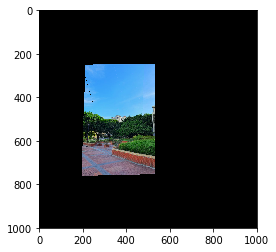

In [18]:
plt.imshow(cv2.cvtColor(blank_image, cv2.COLOR_BGR2RGB))
plt.show()

### 存檔

In [19]:
cv2.imwrite('./output_file/with_gain.jpg', blank_image)